In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

- import 
Berguna untuk mengambil library yang tersedia pada Jupyter
- pandas
Library ini berguna dalam manipulasi data, menulis & membaca data,analisis, membuang data yang terdapat pada dataset, serta menampilkan data dalam bentuk gambar/grafik
- seaborn
Seaborn berfungsi untuk menampilkan visualisasi data, dalam kasus ini saya menggunakan seaborn dalam menampilkan data asli maupun data prediksi
- %matplotlib inline
- import matplotlib.pyplot as plt
Berfungsi untuk memaksukan data yang sudah dibuat ke pada library pandas, serta bisa untuk membuat interface yang interaktif
- math
Berguna agar kita bisa melakukan perhitungan pada Data, contohnya pada In [17]

In [3]:
data = pd.read_csv('R02_rice_field.csv')
data

,Production (X),Harvest Area (Y)
0,1329536.00,323589.00
1,1299699.00,329041.00
2,1382905.00,339253.00
3,1419128.00,348223.00
4,1368074.00,337561.00
...,...,...
219,3831923.00,390799.00
220,4090654.00,396559.00
221,2488641.91,511940.93
222,2164089.33,464103.42


Command ini, berguna untuk mengambil file "R02_rice_field.csv" yang sudah ditaruh dalam 1 folder dengan file jupyter yang sedang digunakan sekaran. Dan juga command "data" berguna untuk menampilkan data yang sudah kita ambil tersebut

In [4]:
data.head()

,Production (X),Harvest Area (Y)
0,1329536.0,323589.0
1,1299699.0,329041.0
2,1382905.0,339253.0
3,1419128.0,348223.0
4,1368074.0,337561.0


Berguna untuk menampilkan 5 data teratas dalam dataset, pada () bisa kita tambahkan angka tergantung seberapa banyak data yang ingin ditampilkan

In [5]:
data.tail()

,Production (X),Harvest Area (Y)
219,3831923.00,390799.00
220,4090654.00,396559.00
221,2488641.91,511940.93
222,2164089.33,464103.42
223,2604913.29,545149.05


Berguna untuk menampilkan 5 data terbawah dalam dataset, pada () bisa kita tambahkan angka tergantung seberapa banyak data yang ingin ditampilkan

In [6]:
print("Jumlah dataset yang dimiliki : "+str(len(data.index)))

Jumlah dataset yang dimiliki : 224


Command ini berguna untuk menghitung jumlah data yang terdapat pada dataset yang kita panggil sebelumnya

In [7]:
data.describe()

,Production (X),Harvest Area (Y)
count,2.240000e+02,224.000000
mean,1.679701e+06,374349.966920
std,1.161387e+06,232751.161987
min,4.293800e+04,63142.040000
25%,5.488570e+05,146919.500000
50%,1.667773e+06,373551.500000
75%,2.436851e+06,514570.250000
max,4.881089e+06,872737.000000


Describe berfungsi untuk untuk mencari jumlah data,  nilai rata rata, standar deviasi, nilai minimum, nilai kuartil 25% - 75%, dan juga niai maximal dari dataset yang kita panggil

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Production (X)    224 non-null    float64
 1   Harvest Area (Y)  224 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB


Info berguna untuk memberikan informasi dari data yang kita akan gunakan, seperti berapa kolom dan apa saja yang ada dalam kolom tersebut dan juga tipe dari data tersebut serta memori yang digunakan

In [9]:
from sklearn.preprocessing import LabelEncoder
for col in ['Production (X)', 'Harvest Area (Y)']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    data
    print (data['Production (X)'], data['Harvest Area (Y)'])

0       87
1       85
2       91
3       96
4       90
      ... 
219    216
220    218
221    171
222    157
223    175
Name: Production (X), Length: 224, dtype: int64 0      323589.00
1      329041.00
2      339253.00
3      348223.00
4      337561.00
         ...    
219    390799.00
220    396559.00
221    511940.93
222    464103.42
223    545149.05
Name: Harvest Area (Y), Length: 224, dtype: float64
0       87
1       85
2       91
3       96
4       90
      ... 
219    216
220    218
221    171
222    157
223    175
Name: Production (X), Length: 224, dtype: int64 0       96
1       97
2      103
3      104
4      101
      ... 
219    118
220    121
221    166
222    148
223    173
Name: Harvest Area (Y), Length: 224, dtype: int64


In [10]:
x = data.drop('Production (X)', axis = 1)
y = data['Harvest Area (Y)']

x = data.drop('Production (X)', axis = 1)
berfungsi menentukan nilai X yaitu Production dan menghilangkan kolomnya sebanyak 1

y = data['Harvest Area (Y)']
Berfungsi untuk menentukan nilai Y

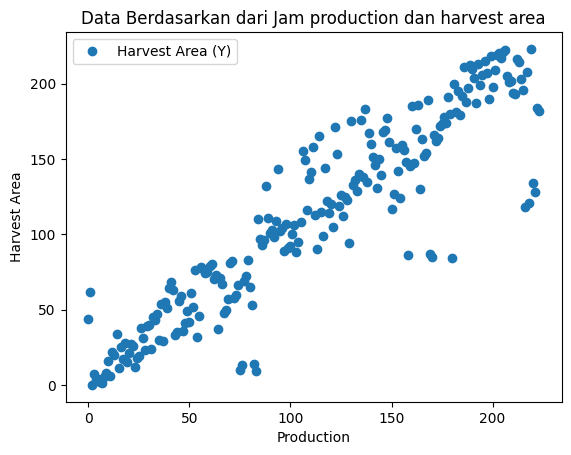

In [11]:
data.plot(x = 'Production (X)', y = 'Harvest Area (Y)', style = 'o')
plt.title('Data Berdasarkan dari Jam production dan harvest area')
plt.xlabel('Production')
plt.ylabel('Harvest Area')
plt.show()

- data.plot
Berguna untuk menentukan titik x dan titik y yang nantinya akan kita tampilkan pada grafik serta memberikan desain pada grafik tersebut
- plt.title
Berguna untuk memberikan judul dari grafik yang kita buat
- plt.xlabel
Berguna untuk memberikan data yang akan kita isi pada tiktik x
- plt.ylabel
Berguna untuk memberikan data yang akan kita isi pada tiktik y
- plt.show()
Berfungsi untuk menampilkan grafik yang sudah kita setting sebelumnnya

In [12]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Command ini berfungsi untuk menentukan variabel yang terdapat pada sumbu x dan y

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Command ini, kita membagi data tersebut menjadi 2 (data untuk testing dan data untuk dilatih)
pada command ini juga kita mengatur ukuran data yang dipakai untuk testing.

In [14]:
from sklearn.naive_bayes import GaussianNB
model_Nb = GaussianNB()
model_Nb = model_Nb.fit(x_train, y_train)

Command ini berfungsi untuk mengimport library GaussianNB dan menamai library tersebut menjadi model_Nb
model_Nb ini akan mengambil nilai pada x_train dan y_train

In [15]:
predict = model_Nb.predict(x_test)

Command ini berfungsi untuk memprediksi nilai pada data x_test

In [16]:
from sklearn.metrics import accuracy_score
print ("Akurasi scorenya sebesar : ", accuracy_score(y_test, predict)*100)

Akurasi scorenya sebesar :  0.0


Berfungsi untuk mengimport library accuracy_score pada skcith learn dan menampilkan total akurasi berdasarkan data y_test dan predict pada x_test lalu di x 100 karena kalau tidak akan menjadi desimal

In [17]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Command diatas berfungsi untuk mengimport library LinearRegression dari sklear (bisa dilakukan pada in[1]) nantinya LinearRegression kita gunakan untuk menggunakan objek regressor dan kita buat model regresi untuk melatih x_train dan y_train

In [18]:
print(regressor.intercept_)

10.506669551762386


Berguna untuk mencari nilai perpotongan(garis) pada regresi

In [19]:
print(regressor.coef_)

[0.89933574]


In [20]:
#Intercept + coef * 3.3
1.157002005347593 + 1.0373496 * 2.5

3.7503760053475927

Perhitungan diatas berguna untuk mencari prediksi seberapa ke-efektifan pembelajaran yang dilakukan berdasarkan 5 data teratas secara manual

In [21]:
y_pred = regressor.predict(x_test)

Command ini berguna untuk mencari prediksi ke-efektifan pembelajaran secara otomatis

In [22]:
data = pd.DataFrame({'Data Asli' : y_test, 'Prediksi' : y_pred})
data

,Data Asli,Prediksi
0,43,40.184749
1,160,136.413673
2,16,19.500027
3,14,84.252200
4,33,49.178106
...,...,...
63,36,52.775449
64,126,122.923637
65,128,209.259869
66,125,124.722309


Berguna untuk menampilkan dataframe prediksi berdasarkan data asli yang kita panggil tadi

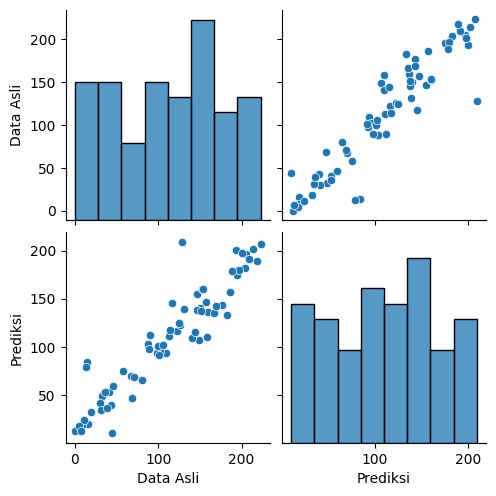

In [23]:
sns.pairplot(data)

Disini merupakan fungsi dari seaborn, yaitu untuk membuat grafik berdasarkan data Student Performance

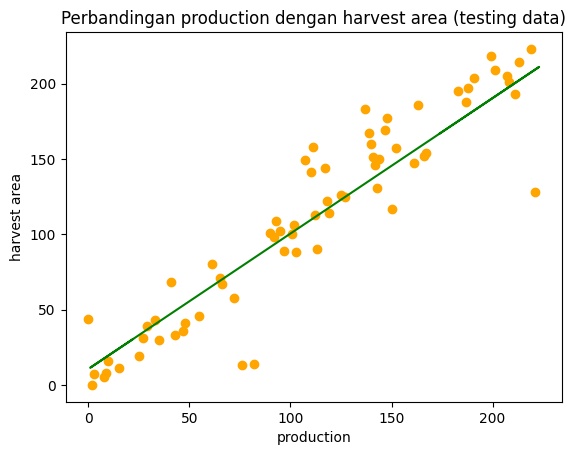

In [24]:
#Grafik berdasarkan dari hasil testing data
plt.scatter(x_test, y_test, color = 'orange')
plt.plot(x_train, regressor.predict(x_train), color = 'green')
plt.title('Perbandingan production dengan harvest area (testing data)')
plt.xlabel('production')
plt.ylabel('harvest area')
plt.show()

- plt.Scatter
merupakan command untuk memanggil desain scatter pada library matplotlib.pyplot serta memasukan data testing dari titik x & y dan pada saat grafiknya dimunculkan akan berwarna oranye
- plt.plot
berfungsi untuk mengambil data dari prediksi pada x_train, dan nantinya akan berwarna  hijau pada grafik yang kita tampilkan
- plt.title
memberikan judul pada grafik yang dibuat
- plt.xlabel 
menentukan data x label pada grafik, yaitu "Study Hours"
- plt.ylabel
menentukan data y label pada grafik, yaitu "Exam Scores"
- plt.show()
berguna untuk menampilkan scatter yang sudah kita setting

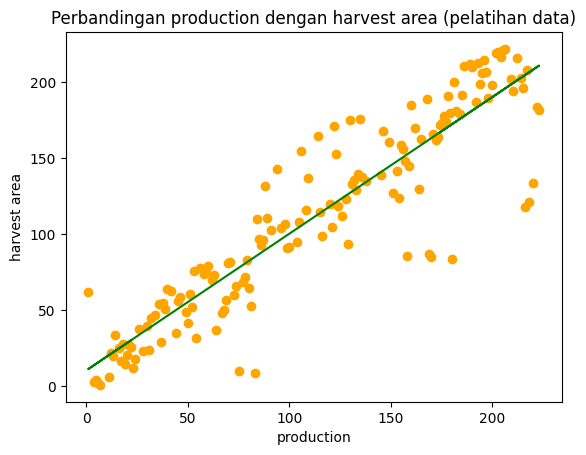

In [25]:
#Gambaran berdasarkan hasil dari pelatihan data
plt.scatter(x_train, y_train, color = 'orange')
plt.plot(x_train, regressor.predict(x_train), color = 'green')
plt.title('Perbandingan production dengan harvest area (pelatihan data)')
plt.xlabel('production')
plt.ylabel('harvest area')
plt.show()

- plt.Scatter
merupakan command untuk memanggil desain scatter pada library matplotlib.pyplot serta memasukan data latihan dari titik x & y dan pada saat grafiknya dimunculkan akan berwarna oranye
- plt.plot
berfungsi untuk mengambil data dari prediksi pada x_train, dan nantinya akan berwarna  hijau pada grafik yang kita tampilkan
- plt.title
memberikan judul pada grafik yang dibuat
- plt.xlabel 
menentukan data x label pada grafik, yaitu "Study Hours"
- plt.ylabel
menentukan data y label pada grafik, yaitu "Exam Scores"
- plt.show()
berguna untuk menampilkan scatter yang sudah kita setting

In [26]:
##hasil akurasi regresi
regressor.score(x_test,y_test)

0.8690255474767583